In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=1000,n_classes=2,random_state=1)

In [2]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [3]:
dummy_model_prob=[0 for _ in range(len(y_test))]


In [4]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [5]:
model_prob=model.predict_proba(X_test)

In [6]:
model_prob=model_prob[:,1]

In [12]:
from sklearn.metrics import roc_auc_score
dummy_model_auc=roc_auc_score(y_test,dummy_model_prob)
model_auc=roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9108885464817668


In [21]:
from sklearn.metrics import roc_curve
dummy_fpr,dummy_tpr,_=roc_curve(y_test,dummy_model_prob)
model_fpr,model_tpr,thresholds=roc_curve(y_test,model_prob)

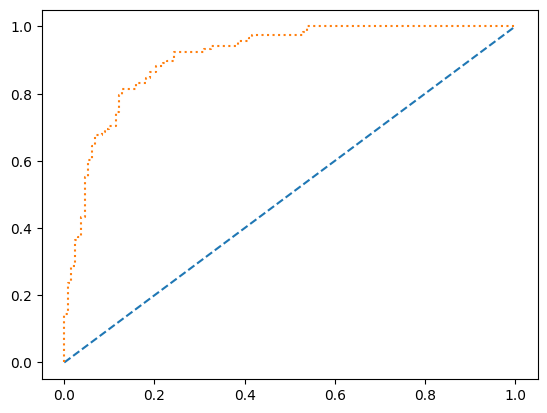

In [ ]:
plt.plot(dummy_fpr,dummy_tpr,linestyle='--',label='Dummy')
plt.plot(model_fpr,model_tpr,linestyle='dotted',label='logistic')


C:\Users\phani\AppData\Local\Temp\ipykernel_24316\3498627246.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


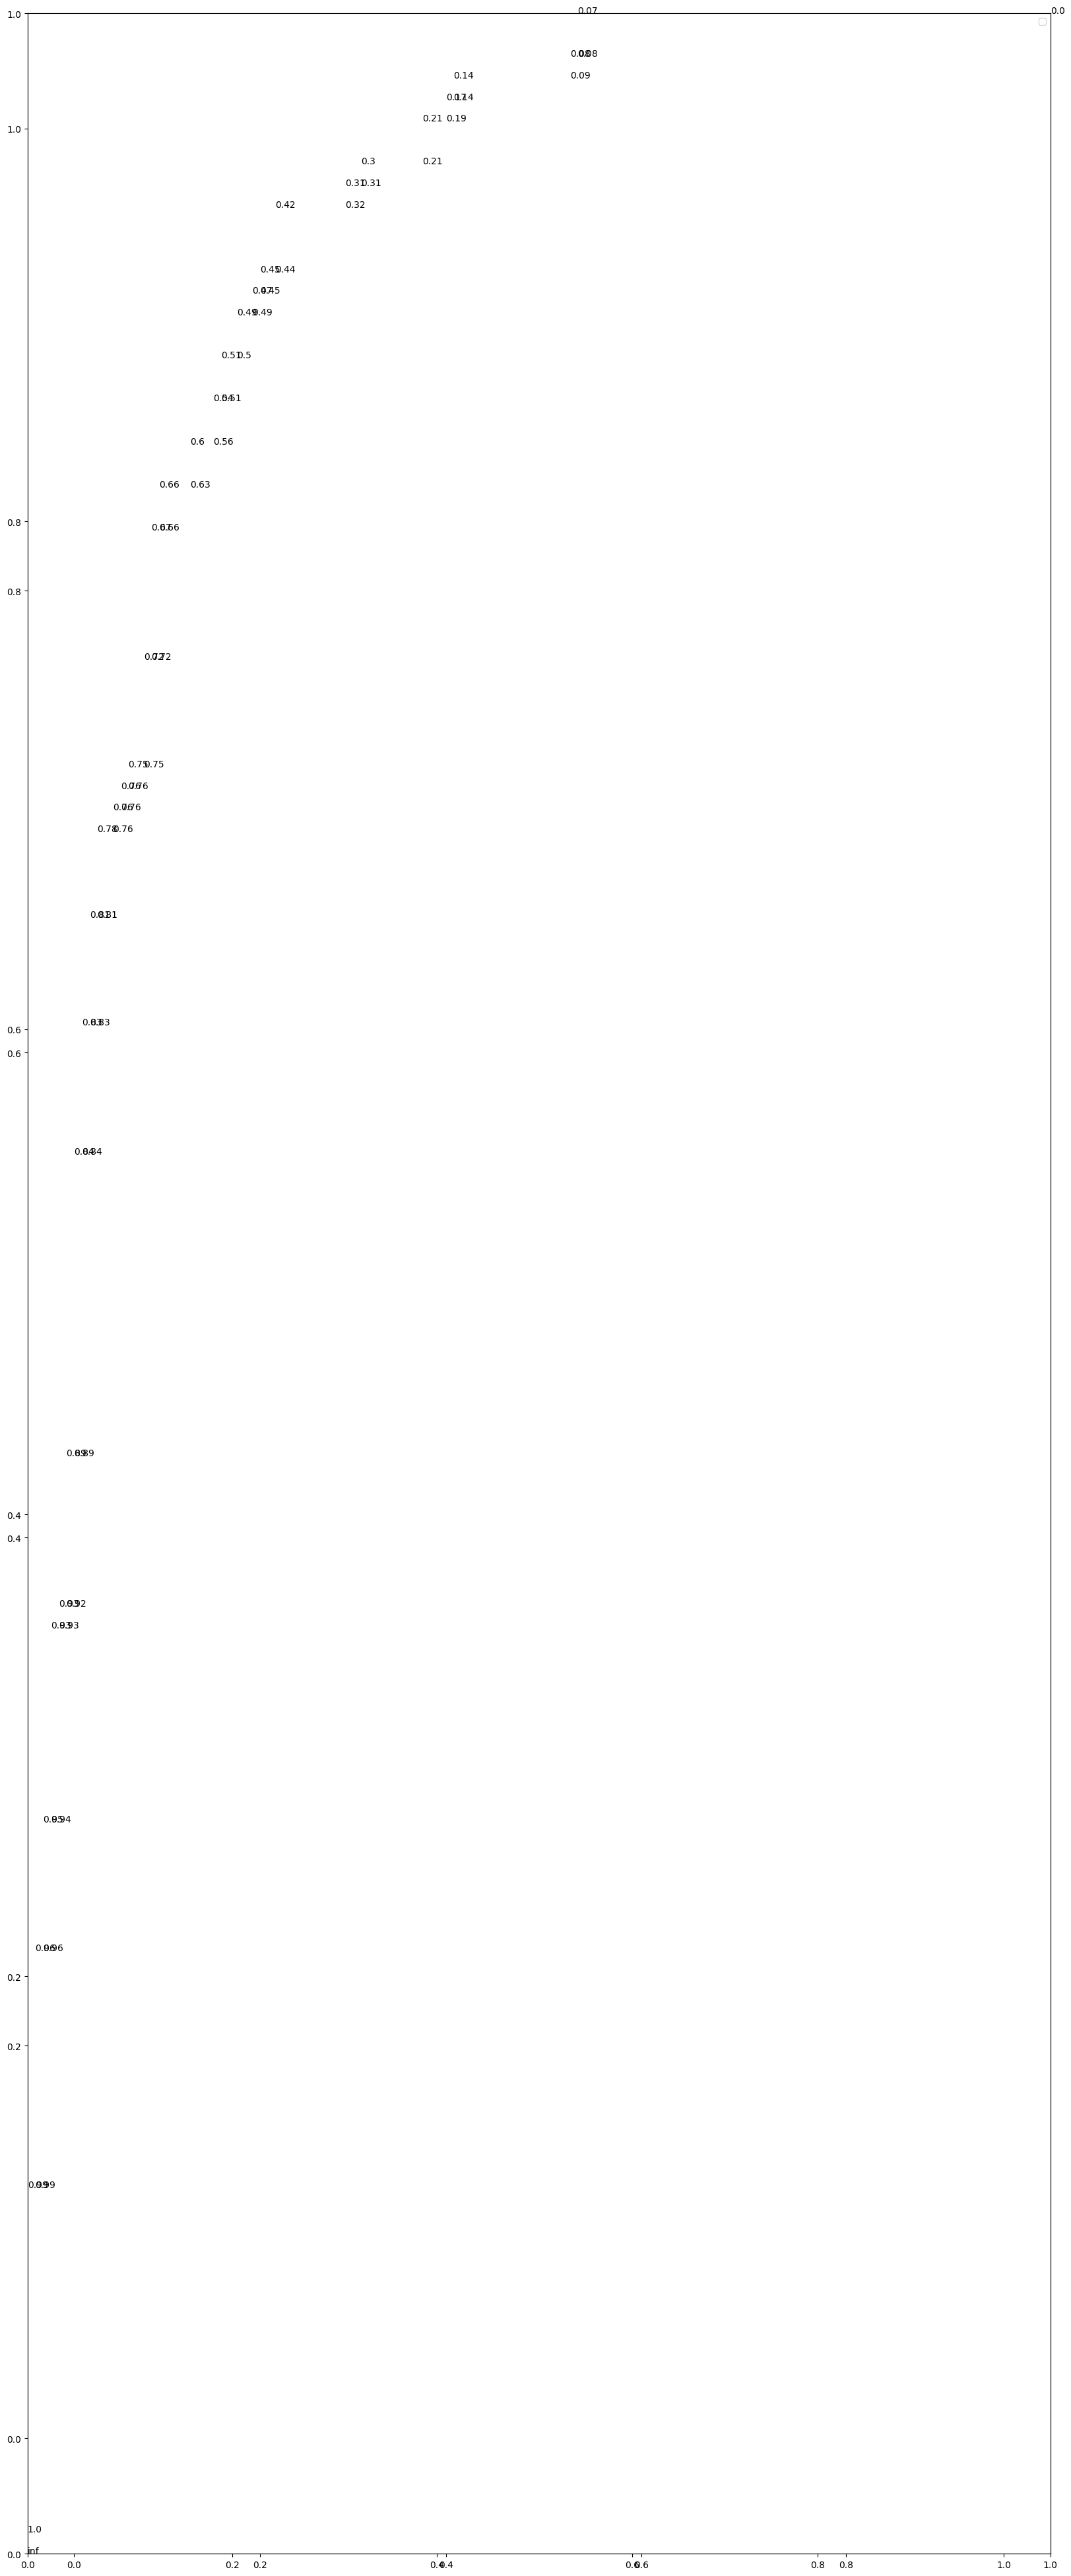

In [26]:
fig=plt.figure(figsize=(20,50))
plt.plot(dummy_fpr,dummy_tpr,linestyle='--',label='Dummy',c='r')
plt.plot(model_fpr,model_tpr,linestyle='dotted',label='logistic')
ax=fig.add_subplot(111)
for xyz in zip(model_fpr,model_tpr,thresholds):
    ax.annotate('%s'% np.round(xyz[2],2),xy=(xyz[0],xyz[1]))
plt.legend()
plt.show()
